In [74]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# 채무 gap 평균 증가량을 (21개 기준)으로 평균 값을 낸 뒤
# 2020년 채무 gdp에 더한 뒤 나눴을 때 60%가 넘는지 확인한뒤
# 넘지 않는다면 2021년 채무 gdp를 더해 다시 평균 증가량을 구해준뒤
# 다시 나눠 60%가 넘는지 확인한 뒤 60%가 넘을 때까지 확인한다.

# 그런 다음 linear regression을 이용하여 그래프 등을 그린다!

In [95]:
print('It is a program that predicts monthly income by entering the number of household members, the age of household owners, and the income quintile!')
df = pd.read_csv("data.csv")
df.dropna()

df.head()

It is a program that predicts monthly income by entering the number of household members, the age of household owners, and the income quintile!


,가구원수,가구주연령,소득,소득분위
0,1.66,59.93,328539,1
1,1.59,61.47,359373,1
2,1.56,62.29,334742,1
3,1.53,62.01,377784,1
4,1.58,63.36,345667,1


In [77]:
from sklearn.model_selection import train_test_split

#train data X = (현재까지 평균 gdp, 현재까지 평균 채무, 현재 gdp, 현재 채무)
#train data Y = (다음 년도 gdp, 다음 년도 채무)

x = df[['가구원수','가구주연령', '소득분위']]
y = df[['소득']]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)


In [78]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [80]:
y_predict = lr.predict(x_test)
# y_predict1 = y_predict
# y_predict2 = y_predict
# print(y_predict)
# print(y_test)
# # print(y_predict)
# print(y_predict.size)
# range1 = y_predict.size/2
# range1 = int(range1)
# y_year = []
# y_rate = []
# print(range1)
# for i in range(1, range1+1):
#     y_year = np.append(y_year, y_predict[i-1][1])
#     y_rate = np.append(y_rate, y_predict[i-1][0])
# print(y_year.size)
# print(y_rate.size)
# print(y_year)
# print(y_rate)

The closer the graph is to a straight line, the more accurate it is.


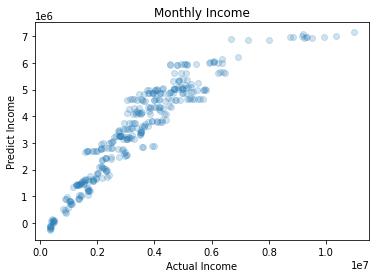

In [93]:
import matplotlib.pyplot as plt

# plt.scatter(y_year, y_rate, alpha=0.4)
plt.scatter(y_test, y_predict, alpha=0.2,
            cmap='viridis')

plt.xlabel("Actual Income")
plt.ylabel("Predict Income")
plt.title("Monthly Income")
# plt.colorbar()
print('The closer the graph is to a straight line, the more accurate it is.')
plt.show()
# plt.show()

# lr.coef_

In [94]:
print('Program Accuracy (Closer to 1, More Accurate)')
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

Program Accuracy (Closer to 1, More Accurate)
0.8632954169460687
0.8543383140807128


In [96]:
input1 = input("Please enter the number of household members: ")
input1 = int(input1)

input2 = input("Please enter the age of the householder: ")
input2 = int(input2)

input3 = input("Please enter your income quintile: ")
input3 = int(input3)

result = []
result.append(input1)
result.append(input2)
result.append(input3)
temp = []
temp.append(result)
my_predict = lr.predict(temp)
my_predict = int(my_predict)
print(my_predict, '원')

Please enter the number of household members: 1
Please enter the age of the householder: 50
Please enter your income quintile: 3
1241473 원
